<h1>Create tables from video games kaggle dataset to implement a Database</h1>
<p style="font-family:  Arial, Helvetica, sans-serif">Inside this notebook could be found the step-by-step to become a dataset from Kaggle related to video games sales to a database(Postgresql). The different tables are obtained in the process to normalize the dataset.</p>


<h1>Dataset information:</h1>
About Dataset
This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com.

Fields include

Rank - Ranking of overall sales

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.)

Year - Year of the game's release

Genre - Genre of the game

Publisher - Publisher of the game

NA_Sales - Sales in North America (in millions)

EU_Sales - Sales in Europe (in millions)

JP_Sales - Sales in Japan (in millions)

Other_Sales - Sales in the rest of the world (in millions)

Global_Sales - Total worldwide sales.

The script to scrape the data is available at https://www.kaggle.com/datasets/gregorut/videogamesales

<h3>Import libraries</h3>

In [66]:
import pandas as pd
import numpy as np

<h1>Load Dataset</h1>

In [67]:
data_raw = pd.read_csv("../vgsales.csv",index_col=False)
print(f'Rows in the dataset = {len(data_raw)}')
data_raw.head(10)

Rows in the dataset = 16598


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


<p>Observing the columns and fields of the dataset. 1st and 2nd forms of normalization have already been achieved. </p>

<p>1NF:that no table column can have tables as values (or no repeating groups) <a>https://en.wikipedia.org/wiki/First_normal_form#:~:text=First%20normal%20form%20(1NF)%20is,(or%20no%20repeating%20groups).</a></p>

<p>2NF:a relation is in 2NF if it is in 1NF and every non-prime attribute of the relation is dependent on the whole of every candidate key.<a>https://en.wikipedia.org/wiki/Second_normal_form</a></p>

## 3FN and 4NF will be applied
Below the dataset with the fields:

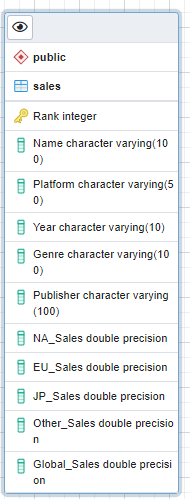

The data is slipt in 3 tables, one related to games, other to the plublisher and other to the sales. 
<p> the table table game had a foreing key to relate with table publisher</p>
<pre>
table_game:
id_game
name_game
genre_name
id_publisher_fk
</pre>

<pre>
Table_publisher:
id_publisher
name_publisher
platform
year
</pre>

<pre>
Table_sale:
id_sales
NA_Sales
EU_Sales
JP_Sales
Other_Sales
Global_Sales
</pre>

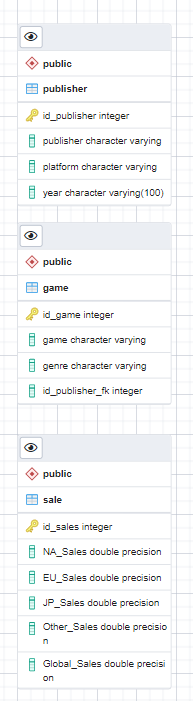

The relation in these tables game and publisher will be one to many, One publisher can released multiple video games.One video game can only be released by one Publisher in a specific year. 
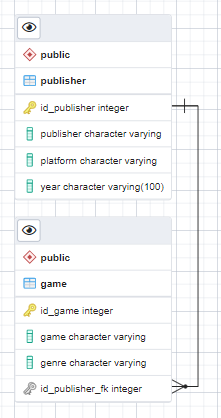

From publisher table will be optained other table, in the next cells of the notebook is the proccess
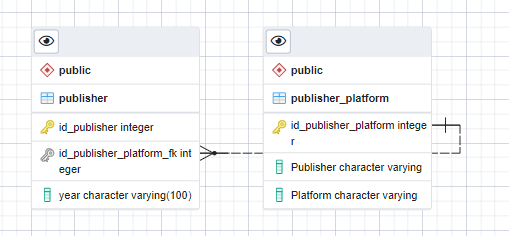

One more table is created, almost all the tables created so far will have one to many relation with this table(game_sales_table)
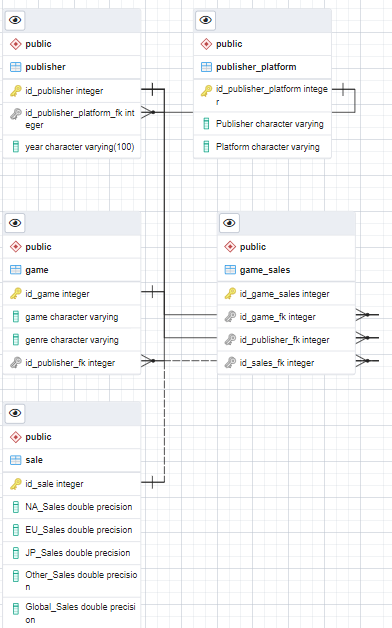


## Columns of the dataset

In [68]:
data_raw.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [69]:
def create_index(start, data,name_id):
    #Create values Index
    index_start=start
    index_end = start + len(data)

    data.loc[:, name_id] = np.arange(index_start,index_end)


In [70]:
#Create main index to dataset
create_index(160, data_raw, 'id')

data_raw.head(9)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,id
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,160
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,161
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,162
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,163
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,164
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,165
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,166
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,167
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62,168


### Let's create publisher table
To create the publisher table, select the attributes Publisher, Platform, and Year. Second, drop duplicates; finally, add an id_publisher to save in a CSV file.

In [80]:
##Select columns of interest to this table
publisher_table = data_raw.loc[:,['Publisher','Platform','Year']]

#Drop the duplicates
publisher_table.drop_duplicates(inplace=True)


#Create Index
create_index(220, publisher_table, 'id_publisher')

#Save CSV
# publisher_table.to_csv('publisher.csv',index=False)
# print(len(publisher_table))
publisher_table

,Publisher,Platform,Year,id_publisher
0,Nintendo,Wii,2006.0,220
1,Nintendo,NES,1985.0,221
2,Nintendo,Wii,2008.0,222
3,Nintendo,Wii,2009.0,223
4,Nintendo,GB,1996.0,224
...,...,...,...,...
16576,Alternative Software,XOne,2016.0,5283
16585,Destineer,PC,2011.0,5284
16593,Kemco,GBA,2002.0,5285
16596,7G//AMES,DS,2010.0,5286


According to the results in the table above, the table can be normalized, columns Publisher and Platform have duplicate values. For instance, Nintendo and Wii are duplicated several times. 
## Let's Create a new table and update the publisher table

In [86]:
##Select columns of interest to this table
publisher_platform = publisher_table.loc[:,['Publisher','Platform']]

#Drop the duplicates
publisher_platform.drop_duplicates(inplace=True)


#Create Index
create_index(320, publisher_platform, 'id_publisher_platform')

#Change the columns position to save the csv
publisher_platform = publisher_platform[["id_publisher_platform","Publisher","Platform"]]

#Save CSV
publisher_platform.to_csv('publisher_platform.csv',index=False)
print(len(publisher_platform))
publisher_platform

1812


,id_publisher_platform,Publisher,Platform
0,320,Nintendo,Wii
1,321,Nintendo,NES
4,322,Nintendo,GB
6,323,Nintendo,DS
15,324,Microsoft Game Studios,X360
...,...,...,...
16565,2127,Rain Games,PSV
16570,2128,UIG Entertainment,PS4
16576,2129,Alternative Software,XOne
16585,2130,Destineer,PC


In [87]:
##Update Publisher table
publisher_table_update = pd.merge(publisher_table, publisher_platform, on=['Publisher','Platform'], how='left')
publisher_table_update_to_save  = publisher_table_update.drop(labels=['Publisher','Platform'], axis=1)

#Change the columns position to save the csv
publisher_table_update_to_save = publisher_table_update_to_save[["id_publisher","id_publisher_platform","Year"]]

#Save CSV
publisher_table_update_to_save.to_csv('publisher.csv',index=False)
print(len(publisher_table_update_to_save))
publisher_table_update_to_save

5068


,id_publisher,id_publisher_platform,Year
0,220,320,2006.0
1,221,321,1985.0
2,222,320,2008.0
3,223,320,2009.0
4,224,322,1996.0
...,...,...,...
5063,5283,2129,2016.0
5064,5284,2130,2011.0
5065,5285,1518,2002.0
5066,5286,2051,2010.0


In the following cell, make a merge with the publisher_table obtained in the above cell with the original dataset; 
with this merge, I am trying to add the id_publisher to the original dataset that will be useful for creating the next tables.

In [85]:
merge_table_to_sales_and_games= pd.merge(data_raw, publisher_table_update, on=['Publisher','Platform','Year'])
print(len(merge_table_to_sales_and_games))
merge_table_to_sales_and_games.head(7)

16598


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,id,id_publisher,id_publisher_platform
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,160,220,320
1,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,167,220,320
2,101,The Legend of Zelda: Twilight Princess,Wii,2006.0,Action,Nintendo,3.83,2.19,0.60,0.70,7.31,260,220,320
3,491,WarioWare: Smooth Moves,Wii,2006.0,Puzzle,Nintendo,0.87,1.06,0.73,0.26,2.92,650,220,320
4,1141,Pokemon Battle Revolution,Wii,2006.0,Role-Playing,Nintendo,0.80,0.38,0.30,0.13,1.61,1299,220,320
5,3698,Excite Truck,Wii,2006.0,Racing,Nintendo,0.40,0.03,0.08,0.04,0.54,3856,220,320
6,5268,Trauma Center: Second Opinion,Wii,2006.0,Simulation,Nintendo,0.28,0.02,0.03,0.03,0.35,5426,220,320


## Let's create the game table

Select the attributes Name, Genre, and id_publisher to create the game table.
The attribute id_publisher gives us the way to develop the relationship between table game and publisher.
Drop the duplicates and add an id_game to save in a CSV file.

In [88]:
##Select columns of interest to this table
game_table = merge_table_to_sales_and_games.loc[:,['Name','Genre','id_publisher']]

#Drop the duplicates
game_table.drop_duplicates(inplace=True)


#Create Index
create_index(440,game_table,'id_game' )

#Change the columns position to save the csv
game_table = game_table[["id_game","Name","Genre","id_publisher"]]

#Save CSV
game_table.to_csv('game.csv',index=False)
print(len(game_table))
game_table

16596


,id_game,Name,Genre,id_publisher
0,440,Wii Sports,Sports,220
1,441,Wii Play,Misc,220
2,442,The Legend of Zelda: Twilight Princess,Action,220
3,443,WarioWare: Smooth Moves,Puzzle,220
4,444,Pokemon Battle Revolution,Role-Playing,220
...,...,...,...,...
16593,17031,Rugby Challenge 3,Sports,5283
16594,17032,Breach,Shooter,5284
16595,17033,Woody Woodpecker in Crazy Castle 5,Platform,5285
16596,17034,Know How 2,Puzzle,5286


Now implement another merge to add the id_game column to the original database.
So now we have id_games and id_publisher in the initial database.

In [89]:
merge_table_to_sales_and_games= pd.merge(merge_table_to_sales_and_games, game_table, on=['Name','Genre','id_publisher'])
print(len(merge_table_to_sales_and_games))
merge_table_to_sales_and_games.head(7)

16598


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,id,id_publisher,id_publisher_platform,id_game
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,160,220,320,440
1,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,167,220,320,441
2,101,The Legend of Zelda: Twilight Princess,Wii,2006.0,Action,Nintendo,3.83,2.19,0.60,0.70,7.31,260,220,320,442
3,491,WarioWare: Smooth Moves,Wii,2006.0,Puzzle,Nintendo,0.87,1.06,0.73,0.26,2.92,650,220,320,443
4,1141,Pokemon Battle Revolution,Wii,2006.0,Role-Playing,Nintendo,0.80,0.38,0.30,0.13,1.61,1299,220,320,444
5,3698,Excite Truck,Wii,2006.0,Racing,Nintendo,0.40,0.03,0.08,0.04,0.54,3856,220,320,445
6,5268,Trauma Center: Second Opinion,Wii,2006.0,Simulation,Nintendo,0.28,0.02,0.03,0.03,0.35,5426,220,320,446


## Let's create the sales table
This table will have the sales information 

In [90]:
##Select columns of interest to this table
sale_table = data_raw.loc[:,['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]

#Drop the duplicates
sale_table.drop_duplicates(inplace=True)


#Create Index
create_index(620,sale_table,'id_sales')

#Change the columns position to save the csv
sale_table = sale_table[['id_sales','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]

#Save CSV
sale_table.to_csv('sales.csv',index=False)
print(len(sale_table))
sale_table

6774


,id_sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,620,41.49,29.02,3.77,8.46,82.74
1,621,29.08,3.58,6.81,0.77,40.24
2,622,15.85,12.88,3.79,3.31,35.82
3,623,15.75,11.01,3.28,2.96,33.00
4,624,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...
15981,7389,0.00,0.00,0.01,0.00,0.01
15984,7390,0.01,0.00,0.00,0.00,0.01
16034,7391,0.01,0.01,0.00,0.00,0.01
16175,7392,0.00,0.01,0.01,0.00,0.01


The last merge in the following cell is to include id_sales into the initial database and create the game_sales table that will relate to all the tables.

In [91]:
merge_table_to_sales_and_games= pd.merge(merge_table_to_sales_and_games,sale_table, on=['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales'],how='left')
print(len(merge_table_to_sales_and_games))
merge_table_to_sales_and_games.tail(7)

16598


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,id,id_publisher,id_publisher_platform,id_game,id_sales
16591,16573,Farming 2017 - The Simulation,PS4,2016.0,Simulation,UIG Entertainment,0.00,0.01,0.00,0.0,0.01,16730,5281,2128,17029,7388
16592,16574,Grisaia no Kajitsu: La Fruit de la Grisaia,PSP,2013.0,Adventure,Prototype,0.00,0.00,0.01,0.0,0.01,16731,5282,1760,17030,7389
16593,16579,Rugby Challenge 3,XOne,2016.0,Sports,Alternative Software,0.00,0.01,0.00,0.0,0.01,16736,5283,2129,17031,7388
16594,16588,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.0,0.01,16745,5284,2130,17032,7390
16595,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.0,0.01,16753,5285,1518,17033,7390
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.0,0.01,16756,5286,2051,17034,7388
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.0,0.01,16757,5287,2131,17035,7390


## Game_Sales table
Let's create the game_sales table selecting id,id_game, id_publisher, id_sales atributes from the initial dataset with the merger done before.

In [93]:
game_sales_table = merge_table_to_sales_and_games.loc[:,['id','id_game','id_publisher','id_sales']]

game_sales_table = game_sales_table.sort_values(by='id')

# Save as CSV file
game_sales_table.to_csv('game_sales.csv', index=False)

print(len(game_sales_table))
game_sales_table.head(10)

16598


,id,id_game,id_publisher,id_sales
0,160,440,220,620
9,161,449,221,621
16,162,456,222,622
28,163,468,223,623
44,164,484,224,624
48,165,488,225,625
57,166,497,226,626
1,167,441,220,627
29,168,469,223,628
93,169,533,227,629


## !!Thanks